In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

런타임 재시작

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2022

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_excel("/content/drive/MyDrive/KOPIS공모전/데이터/EDA용 데이터/20221224.xlsx")
df.head()

,좌석수,공연코드,공연일시,예매/취소일시,예매/취소구분,예매/취소매수,예매/취소금액,예매/취소방식명(관리시스템),할인금액,할인종류명(전송처),...,출연진내용,아동공연 여부,내한공연 여부,오픈런 여부,판매시작일시,판매종료일시,좌석등급,극장규모,재관람,조기예매
0,250,PF392163,2022-12-24 10:30,2022-12-08 15:39:00,1,1,24500,모바일,0,기타,...,"지인호, 한종두, 채현우, 유승옥, 박은경, 임윤서, 남기형 등",N,N,Y,2020-04-04,9999/12/31 12:00:00,전석(40000),1,0,0
1,250,PF392163,2022-12-24 10:30,2022-12-08 15:39:00,1,1,24500,모바일,0,기타,...,"지인호, 한종두, 채현우, 유승옥, 박은경, 임윤서, 남기형 등",N,N,Y,2020-04-04,9999/12/31 12:00:00,전석(40000),1,0,0
2,250,PF392163,2022-12-24 10:30,2022-12-11 21:28:00,1,1,24900,모바일,0,기타,...,"지인호, 한종두, 채현우, 유승옥, 박은경, 임윤서, 남기형 등",N,N,Y,2020-04-04,9999/12/31 12:00:00,전석(40000),1,0,0
3,250,PF392163,2022-12-24 10:30,2022-12-11 21:28:00,1,1,24900,모바일,0,기타,...,"지인호, 한종두, 채현우, 유승옥, 박은경, 임윤서, 남기형 등",N,N,Y,2020-04-04,9999/12/31 12:00:00,전석(40000),1,0,0
4,250,PF392163,2022-12-24 10:30,2022-12-11 21:28:00,1,1,24900,모바일,0,기타,...,"지인호, 한종두, 채현우, 유승옥, 박은경, 임윤서, 남기형 등",N,N,Y,2020-04-04,9999/12/31 12:00:00,전석(40000),1,0,0


In [5]:
df.columns

Index(['좌석수', '공연코드', '공연일시', '예매/취소일시', '예매/취소구분', '예매/취소매수', '예매/취소금액',
       '예매/취소방식명(관리시스템)', '할인금액', '할인종류명(전송처)', '장당금액', '성별', '연령', '공연시작일자',
       '공연종료일자', '장르명', '공연지역명', '출연진내용', '아동공연 여부', '내한공연 여부', '오픈런 여부',
       '판매시작일시', '판매종료일시', '좌석등급', '극장규모', '재관람', '조기예매'],
      dtype='object')

In [6]:
# 일시 변수 결측치 확인
# 예매취소일시
df['예매/취소일시'].value_counts()

,count
예매/취소일시,
2022-10-13 14:01:00,231
2022-11-24 15:01:00,210
2022-10-13 14:02:00,196
2022-10-14 16:01:00,181
2022-10-13 14:00:00,154
...,...
2022-11-06 06:15:00,1
2022-11-06 00:29:00,1
2022-11-05 21:20:00,1


In [7]:
# 공연일시
df['공연일시'].value_counts()

,count
공연일시,
2022-12-24 14:00,32073
2022-12-24 19:00,19591
2022-12-24 15:00,13708
2022-12-24 19:30,9598
2022-12-24 18:00,8917
2022-12-24 17:00,7119
2022-12-24 16:00,5509
2022-12-24 18:30,5167
2022-12-24 20:00,2749


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115273 entries, 0 to 115272
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   좌석수              115273 non-null  int64         
 1   공연코드             115273 non-null  object        
 2   공연일시             115273 non-null  object        
 3   예매/취소일시          115273 non-null  datetime64[ns]
 4   예매/취소구분          115273 non-null  int64         
 5   예매/취소매수          115273 non-null  int64         
 6   예매/취소금액          115273 non-null  int64         
 7   예매/취소방식명(관리시스템)  115273 non-null  object        
 8   할인금액             115273 non-null  int64         
 9   할인종류명(전송처)       42085 non-null   object        
 10  장당금액             115273 non-null  int64         
 11  성별               115273 non-null  int64         
 12  연령               115273 non-null  int64         
 13  공연시작일자           115273 non-null  object        
 14  공연종료일자           115

In [9]:
# 일시 인코딩
# 날짜 및 시간 데이터 인코딩
# 공연일시
df['공연일시'] = pd.to_datetime(df['공연일시'])
df['공연일시_시간'] = df['공연일시'].dt.hour


# 공연시작일자
# 날짜 및 시간 데이터 인코딩
df['공연시작일자'] = pd.to_datetime(df['공연시작일자'])
df['공연시작일자_연'] = df['공연시작일자'].dt.year
df['공연시작일자_월'] = df['공연시작일자'].dt.month
df['공연시작일자_일'] = df['공연시작일자'].dt.day

# 공연종료일자
# 날짜 및 시간 데이터 인코딩
df['공연종료일자'] = pd.to_datetime(df['공연종료일자'])
df['공연종료일자_연'] = df['공연종료일자'].dt.year
df['공연종료일자_월'] = df['공연종료일자'].dt.month
df['공연종료일자_일'] = df['공연종료일자'].dt.day


In [10]:
df_play=df[df['장르명']=='연극']
df_musical=df[df['장르명']=='뮤지컬']

In [11]:
# 스타배우 칼럼 만들기
lst=['최정원', '고준희', '신성록', '차승원', '진선규', '엄기준', '양지원', '나문희', '봉태규', '김선영', '김수미', '고두심', '염혜란',
     '문소리', '박정원', '박은석', '박해수', '박소담', '정성일', '지현준', '이순재', '신구', '홍승안', '정휘', '전성우', '박정복', '전동석',
     '강홍석', '조승우', '옥주현', '정선아', '민경아', '김선영', '최재림', '전미도', '카이', '김준수', '홍강호', '박효신', '박강현', '정성화', '규현',
     '박은태', '박성훈', '조정석', '김승우', '지창욱', '홍광호', '신영숙', '차지연', '지창욱', '한지상', '마이클리', '김소현', '박건형', '윤공주', '바다', '서범석', '아이비']

# 스타배우 칼럼 추가
df_play['스타배우'] = df_play['출연진내용'].apply(
    lambda x: 1 if isinstance(x, str) and any(actor in x.split(', ') for actor in lst) else 0
)


df_musical['스타배우'] = df_musical['출연진내용'].apply(
    lambda x: 1 if isinstance(x, str) and any(actor in x.split(', ') for actor in lst) else 0
)


<ipython-input-11-ef22112668e2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_play['스타배우'] = df_play['출연진내용'].apply(
<ipython-input-11-ef22112668e2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_musical['스타배우'] = df_musical['출연진내용'].apply(


In [12]:
df_play.columns

Index(['좌석수', '공연코드', '공연일시', '예매/취소일시', '예매/취소구분', '예매/취소매수', '예매/취소금액',
       '예매/취소방식명(관리시스템)', '할인금액', '할인종류명(전송처)', '장당금액', '성별', '연령', '공연시작일자',
       '공연종료일자', '장르명', '공연지역명', '출연진내용', '아동공연 여부', '내한공연 여부', '오픈런 여부',
       '판매시작일시', '판매종료일시', '좌석등급', '극장규모', '재관람', '조기예매', '공연일시_시간',
       '공연시작일자_연', '공연시작일자_월', '공연시작일자_일', '공연종료일자_연', '공연종료일자_월', '공연종료일자_일',
       '스타배우'],
      dtype='object')

In [13]:
df['예매/취소방식명(관리시스템)'].value_counts()

,count
예매/취소방식명(관리시스템),
모바일,73125
웹,42148


# 티켓 가격 종속변수 회귀분석

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 종속변수 : 장당금액


독립변수 : ['좌석수', '공연일시', '예매/취소금액',
       '예매/취소방식명(관리시스템)', '할인금액', '할인종류명(전송처)', '장당금액', '성별', '연령', '공연시작일자',
       '공연종료일자', '공연지역명', '출연진내용', '아동공연 여부', '내한공연 여부', '오픈런 여부',
       '판매시작일시', '판매종료일시', '극장규모', '재관람', '조기예매'],

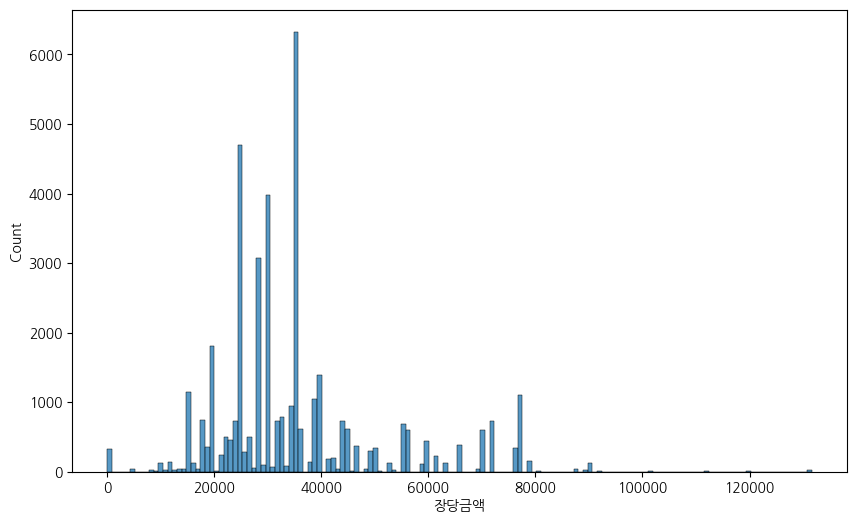

In [15]:
# 장당금액 살펴보기
plt.figure(figsize=(10,6))
sns.histplot(df_play['장당금액'])
plt.show()

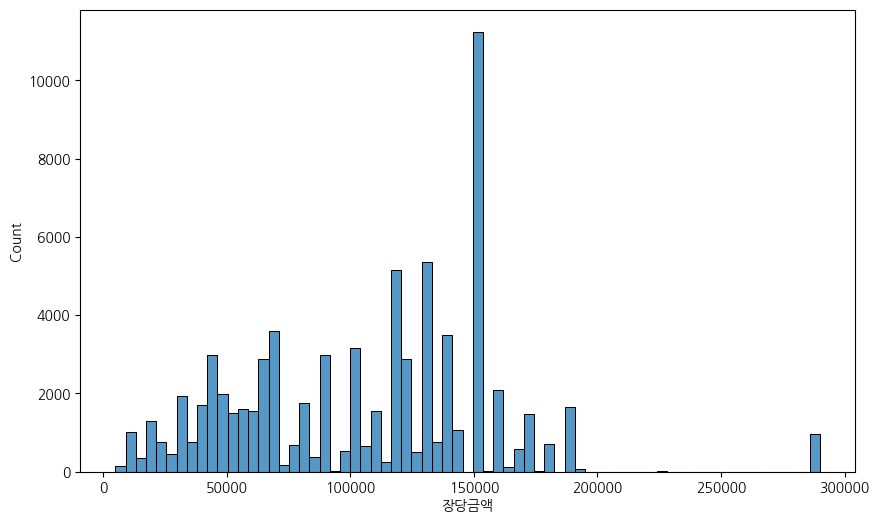

In [16]:
# 장당금액 살펴보기
plt.figure(figsize=(10,6))
sns.histplot(df_musical['장당금액'])
plt.show()

In [17]:
# 인코딩
df_play = pd.get_dummies(df_play, columns=['공연지역명', '예매/취소방식명(관리시스템)','내한공연 여부','오픈런 여부'],
                         prefix=['공연지역명', '예매/취소방식명(관리시스템)','내한공연 여부','오픈런 여부'])
df_musical = pd.get_dummies(df_musical, columns=['공연지역명', '예매/취소방식명(관리시스템)','내한공연 여부','오픈런 여부'],
                            prefix=['공연지역명', '예매/취소방식명(관리시스템)','내한공연 여부','오픈런 여부'])

In [18]:
df_play.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40569 entries, 0 to 115272
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   좌석수                  40569 non-null  int64         
 1   공연코드                 40569 non-null  object        
 2   공연일시                 40569 non-null  datetime64[ns]
 3   예매/취소일시              40569 non-null  datetime64[ns]
 4   예매/취소구분              40569 non-null  int64         
 5   예매/취소매수              40569 non-null  int64         
 6   예매/취소금액              40569 non-null  int64         
 7   할인금액                 40569 non-null  int64         
 8   할인종류명(전송처)           22528 non-null  object        
 9   장당금액                 40569 non-null  int64         
 10  성별                   40569 non-null  int64         
 11  연령                   40569 non-null  int64         
 12  공연시작일자               40569 non-null  datetime64[ns]
 13  공연종료일자               40569 non-null

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


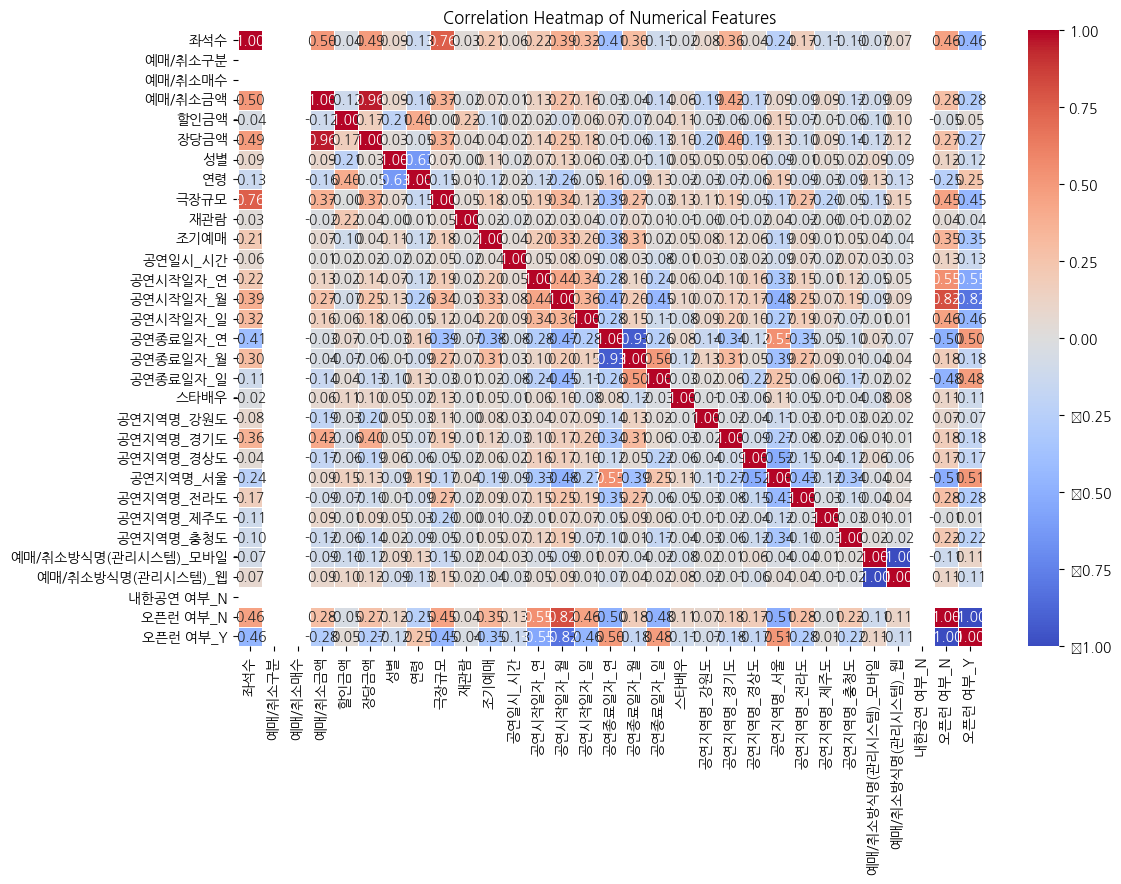

In [19]:
# 수치형 데이터만 선택
df_numeric_play = df_play.select_dtypes(include=['int64', 'int32', 'float64', 'bool'])

# 상관관계 행렬 계산 및 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric_play.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


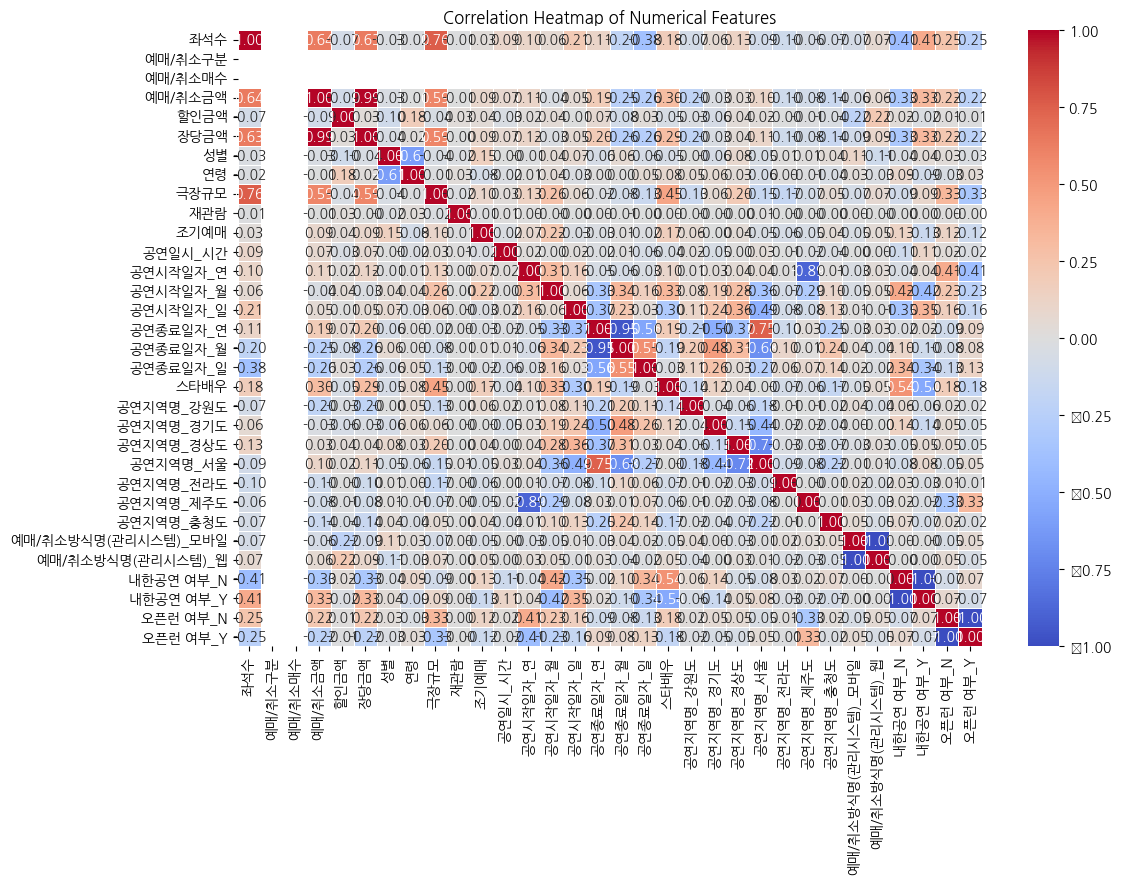

In [20]:
# 수치형 데이터만 선택
df_numeric_musical = df_musical.select_dtypes(include=['int64', 'int32', 'float64', 'bool'])

# 상관관계 행렬 계산 및 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric_musical.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [21]:
df_play.columns

Index(['좌석수', '공연코드', '공연일시', '예매/취소일시', '예매/취소구분', '예매/취소매수', '예매/취소금액',
       '할인금액', '할인종류명(전송처)', '장당금액', '성별', '연령', '공연시작일자', '공연종료일자', '장르명',
       '출연진내용', '아동공연 여부', '판매시작일시', '판매종료일시', '좌석등급', '극장규모', '재관람', '조기예매',
       '공연일시_시간', '공연시작일자_연', '공연시작일자_월', '공연시작일자_일', '공연종료일자_연', '공연종료일자_월',
       '공연종료일자_일', '스타배우', '공연지역명_강원도', '공연지역명_경기도', '공연지역명_경상도', '공연지역명_서울',
       '공연지역명_전라도', '공연지역명_제주도', '공연지역명_충청도', '예매/취소방식명(관리시스템)_모바일',
       '예매/취소방식명(관리시스템)_웹', '내한공연 여부_N', '오픈런 여부_N', '오픈런 여부_Y'],
      dtype='object')

In [22]:
df_musical.columns

Index(['좌석수', '공연코드', '공연일시', '예매/취소일시', '예매/취소구분', '예매/취소매수', '예매/취소금액',
       '할인금액', '할인종류명(전송처)', '장당금액', '성별', '연령', '공연시작일자', '공연종료일자', '장르명',
       '출연진내용', '아동공연 여부', '판매시작일시', '판매종료일시', '좌석등급', '극장규모', '재관람', '조기예매',
       '공연일시_시간', '공연시작일자_연', '공연시작일자_월', '공연시작일자_일', '공연종료일자_연', '공연종료일자_월',
       '공연종료일자_일', '스타배우', '공연지역명_강원도', '공연지역명_경기도', '공연지역명_경상도', '공연지역명_서울',
       '공연지역명_전라도', '공연지역명_제주도', '공연지역명_충청도', '예매/취소방식명(관리시스템)_모바일',
       '예매/취소방식명(관리시스템)_웹', '내한공연 여부_N', '내한공연 여부_Y', '오픈런 여부_N', '오픈런 여부_Y'],
      dtype='object')

독립변수 :['좌석수',
       '할인금액','성별', '연령', '극장규모', '재관람', '조기예매',
       '공연일시_시간', '공연시작일자_연', '공연시작일자_월', '공연시작일자_일', '공연종료일자_연', '공연종료일자_월',
       '공연종료일자_일', '스타배우', '공연지역명_강원도', '공연지역명_경기도', '공연지역명_경상도', '공연지역명_서울',
       '공연지역명_전라도', '공연지역명_제주도', '공연지역명_충청도', '예매/취소방식명(관리시스템)_모바일',
       '예매/취소방식명(관리시스템)_웹', '내한공연 여부_N', '오픈런 여부_N', '오픈런 여부_Y']

In [23]:
# 연극
# 독립변수와 종속변수 설정
X_play = df_play[['좌석수', '할인금액','성별', '연령', '극장규모', '재관람', '조기예매', '공연일시_시간', '공연시작일자_연', '공연시작일자_월', '공연시작일자_일', '공연종료일자_연', '공연종료일자_월', '공연종료일자_일', '스타배우', '공연지역명_강원도', '공연지역명_경기도', '공연지역명_경상도', '공연지역명_서울', '공연지역명_전라도', '공연지역명_제주도', '공연지역명_충청도',
                  '예매/취소방식명(관리시스템)_모바일', '예매/취소방식명(관리시스템)_웹', '내한공연 여부_N', '오픈런 여부_N', '오픈런 여부_Y']]

y_play = df_play['장당금액']

# Train-Test Split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_play, y_play, test_size=0.2, random_state=42)

# 회귀모델 학습
model = LinearRegression()
model.fit(X_train_p, y_train_p)

# 테스트 데이터로 예측
y_pred_p = model.predict(X_test_p)

# 모델 평가
mse = mean_squared_error(y_test_p, y_pred_p)
r2 = r2_score(y_test_p, y_pred_p)

print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 110267946.17246105
R-squared: 0.5933671349277091


In [24]:
import numpy as np
import statsmodels.api as sm

# 모든 변수를 float64로 변환
X_train_float = X_train_p.astype(np.float64)
y_train_float = y_train_p.astype(np.float64)

# 상수항 추가 (절편을 포함하기 위해 필요)
X_train_sm = sm.add_constant(X_train_float)

# OLS(Ordinary Least Squares) 모델 적합
model_sm = sm.OLS(y_train_float, X_train_sm).fit()

# 회귀 분석 요약 출력
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                   장당금액   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     1876.
Date:                Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                        05:49:32   Log-Likelihood:            -3.4654e+05
No. Observations:               32455   AIC:                         6.931e+05
Df Residuals:                   32431   BIC:                         6.933e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
좌석수                    18.0158    

**전부 유의**

In [25]:
# 뮤지컬
# 연극
# 독립변수와 종속변수 설정
X_mus = df_musical[['좌석수', '할인금액','성별', '연령', '극장규모', '재관람', '조기예매', '공연일시_시간', '공연시작일자_연', '공연시작일자_월', '공연시작일자_일', '공연종료일자_연', '공연종료일자_월', '공연종료일자_일', '스타배우', '공연지역명_강원도', '공연지역명_경기도', '공연지역명_경상도', '공연지역명_서울', '공연지역명_전라도', '공연지역명_제주도', '공연지역명_충청도',
                  '예매/취소방식명(관리시스템)_모바일', '예매/취소방식명(관리시스템)_웹', '내한공연 여부_Y','내한공연 여부_N', '오픈런 여부_N', '오픈런 여부_Y']]

y_mus = df_musical['장당금액']

# Train-Test Split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_mus, y_mus, test_size=0.2, random_state=42)

# 회귀모델 학습
model = LinearRegression()
model.fit(X_train_m, y_train_m)

# 테스트 데이터로 예측
y_pred_m = model.predict(X_test_m)

# 모델 평가
mse = mean_squared_error(y_test_m, y_pred_m)
r2 = r2_score(y_test_m, y_pred_m)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1148039369.5545542
R-squared: 0.559710609811715


In [26]:
import numpy as np
import statsmodels.api as sm

# 모든 변수를 float64로 변환
X_train_float = X_train_m.astype(np.float64)
y_train_float = y_train_m.astype(np.float64)

# 상수항 추가 (절편을 포함하기 위해 필요)
X_train_sm = sm.add_constant(X_train_float)

# OLS(Ordinary Least Squares) 모델 적합
model_sm = sm.OLS(y_train_float, X_train_sm).fit()

# 회귀 분석 요약 출력
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   장당금액   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     3268.
Date:                Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                        05:49:33   Log-Likelihood:            -7.0707e+05
No. Observations:               59763   AIC:                         1.414e+06
Df Residuals:                   59738   BIC:                         1.414e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -5.562e+07   1

**재관람이 유의하지 않게 나왔다**

### 종속변수 : 예매/취소 금액

In [27]:
# 연극
# 독립변수와 종속변수 설정
X_play = df_play[['좌석수', '할인금액','성별', '연령', '극장규모', '재관람', '조기예매', '공연일시_시간', '공연시작일자_연', '공연시작일자_월', '공연시작일자_일', '공연종료일자_연', '공연종료일자_월', '공연종료일자_일', '스타배우', '공연지역명_강원도', '공연지역명_경기도', '공연지역명_경상도', '공연지역명_서울', '공연지역명_전라도', '공연지역명_제주도', '공연지역명_충청도',
                  '예매/취소방식명(관리시스템)_모바일', '예매/취소방식명(관리시스템)_웹', '내한공연 여부_N', '오픈런 여부_N', '오픈런 여부_Y']]

y_play = df_play['예매/취소금액']

# Train-Test Split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_play, y_play, test_size=0.2, random_state=42)

# 회귀모델 학습
model = LinearRegression()
model.fit(X_train_p, y_train_p)

# 테스트 데이터로 예측
y_pred_p = model.predict(X_test_p)

# 모델 평가
mse = mean_squared_error(y_test_p, y_pred_p)
r2 = r2_score(y_test_p, y_pred_p)

print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 110228214.27232656
R-squared: 0.5877986640430384


In [28]:
import numpy as np
import statsmodels.api as sm

# 모든 변수를 float64로 변환
X_train_float = X_train_p.astype(np.float64)
y_train_float = y_train_p.astype(np.float64)

# 상수항 추가 (절편을 포함하기 위해 필요)
X_train_sm = sm.add_constant(X_train_float)

# OLS(Ordinary Least Squares) 모델 적합
model_sm = sm.OLS(y_train_float, X_train_sm).fit()

# 회귀 분석 요약 출력
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                예매/취소금액   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     1827.
Date:                Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                        05:49:33   Log-Likelihood:            -3.4653e+05
No. Observations:               32455   AIC:                         6.931e+05
Df Residuals:                   32431   BIC:                         6.933e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
좌석수                    18.0135    

전부 유의

In [29]:
# 뮤지컬
# 연극
# 독립변수와 종속변수 설정
X_mus = df_musical[['좌석수', '할인금액','성별', '연령', '극장규모', '재관람', '조기예매', '공연일시_시간', '공연시작일자_연', '공연시작일자_월', '공연시작일자_일', '공연종료일자_연', '공연종료일자_월', '공연종료일자_일', '스타배우', '공연지역명_강원도', '공연지역명_경기도', '공연지역명_경상도', '공연지역명_서울', '공연지역명_전라도', '공연지역명_제주도', '공연지역명_충청도',
                  '예매/취소방식명(관리시스템)_모바일', '예매/취소방식명(관리시스템)_웹', '내한공연 여부_Y','내한공연 여부_N', '오픈런 여부_N', '오픈런 여부_Y']]

y_mus = df_musical['예매/취소금액']

# Train-Test Split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_mus, y_mus, test_size=0.2, random_state=42)

# 회귀모델 학습
model = LinearRegression()
model.fit(X_train_m, y_train_m)

# 테스트 데이터로 예측
y_pred_m = model.predict(X_test_m)

# 모델 평가
mse = mean_squared_error(y_test_m, y_pred_m)
r2 = r2_score(y_test_m, y_pred_m)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1144663105.1822891
R-squared: 0.5631780893010316


In [30]:
import numpy as np
import statsmodels.api as sm

# 모든 변수를 float64로 변환
X_train_float = X_train_m.astype(np.float64)
y_train_float = y_train_m.astype(np.float64)

# 상수항 추가 (절편을 포함하기 위해 필요)
X_train_sm = sm.add_constant(X_train_float)

# OLS(Ordinary Least Squares) 모델 적합
model_sm = sm.OLS(y_train_float, X_train_sm).fit()

# 회귀 분석 요약 출력
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                예매/취소금액   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     3330.
Date:                Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                        05:49:33   Log-Likelihood:            -7.0697e+05
No. Observations:               59763   AIC:                         1.414e+06
Df Residuals:                   59738   BIC:                         1.414e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -5.59e+07   1


재관람 유의 X

# 회귀분석 결론

- 뮤지컬에서 자꾸 재관람이 유의하지 않은 변수로 나온다.

# 재관람 여부 로지스틱 회귀분석

시도해봤는데 재관람 데이터가 워낙 불균형해서 성능이 너무 안좋아서 안하는 게 나을듯함

# 티켓 가격 예측 랜덤포레스트

In [31]:
from sklearn.ensemble import RandomForestRegressor

Mean Squared Error: 24951592.02428583
R2 Score: 0.9066928586790522


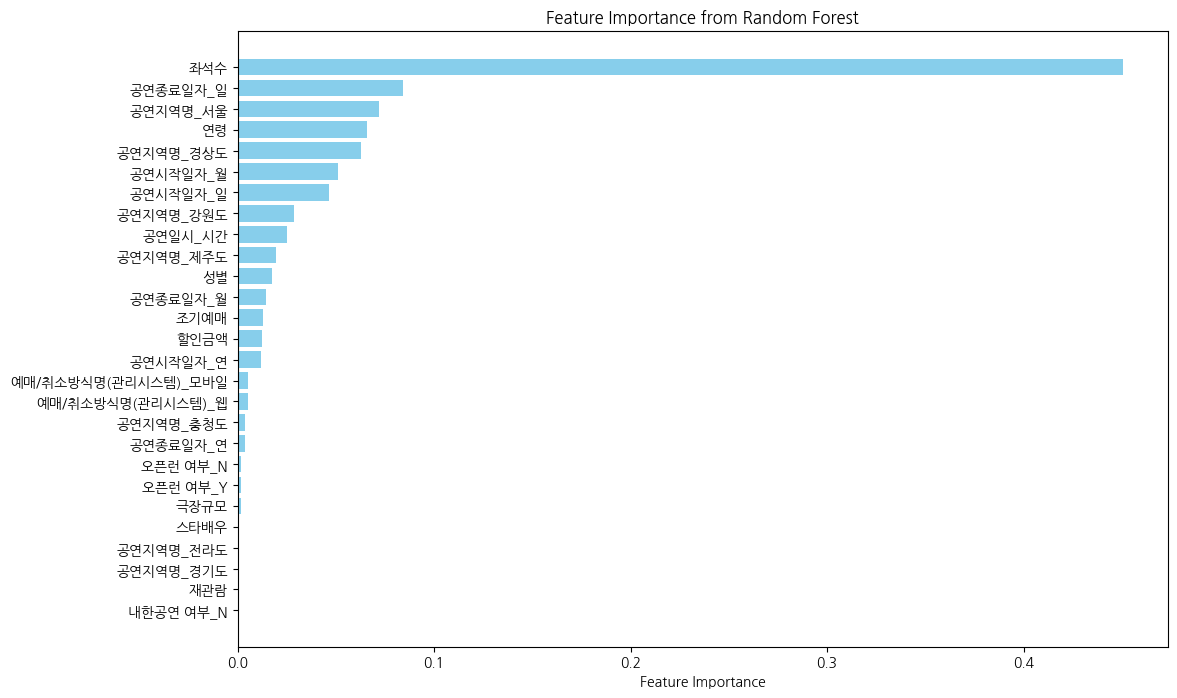

In [32]:
# 연극
# 독립변수와 종속변수 설정
X_play = df_play[['좌석수', '할인금액','성별', '연령', '극장규모', '재관람', '조기예매', '공연일시_시간', '공연시작일자_연', '공연시작일자_월', '공연시작일자_일', '공연종료일자_연', '공연종료일자_월', '공연종료일자_일', '스타배우', '공연지역명_강원도', '공연지역명_경기도', '공연지역명_경상도', '공연지역명_서울', '공연지역명_전라도', '공연지역명_제주도', '공연지역명_충청도',
                  '예매/취소방식명(관리시스템)_모바일', '예매/취소방식명(관리시스템)_웹', '내한공연 여부_N', '오픈런 여부_N', '오픈런 여부_Y']]

y_play = df_play['장당금액']

# 랜덤 포레스트 회귀 모델 학습
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_p, y_train_p)

# 테스트 데이터 예측
y_pred_p = rf_model.predict(X_test_p)

# 모델 성능 평가
mse = mean_squared_error(y_test_p, y_pred_p)
r2 = r2_score(y_test_p, y_pred_p)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# 피쳐 중요도 추출
feature_importances = rf_model.feature_importances_

# 피쳐 중요도를 시각화하기 위해 정렬
features = X_play.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 피쳐 중요도 시각화
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()


Mean Squared Error: 740123096.715154
R2 Score: 0.7161522892342803


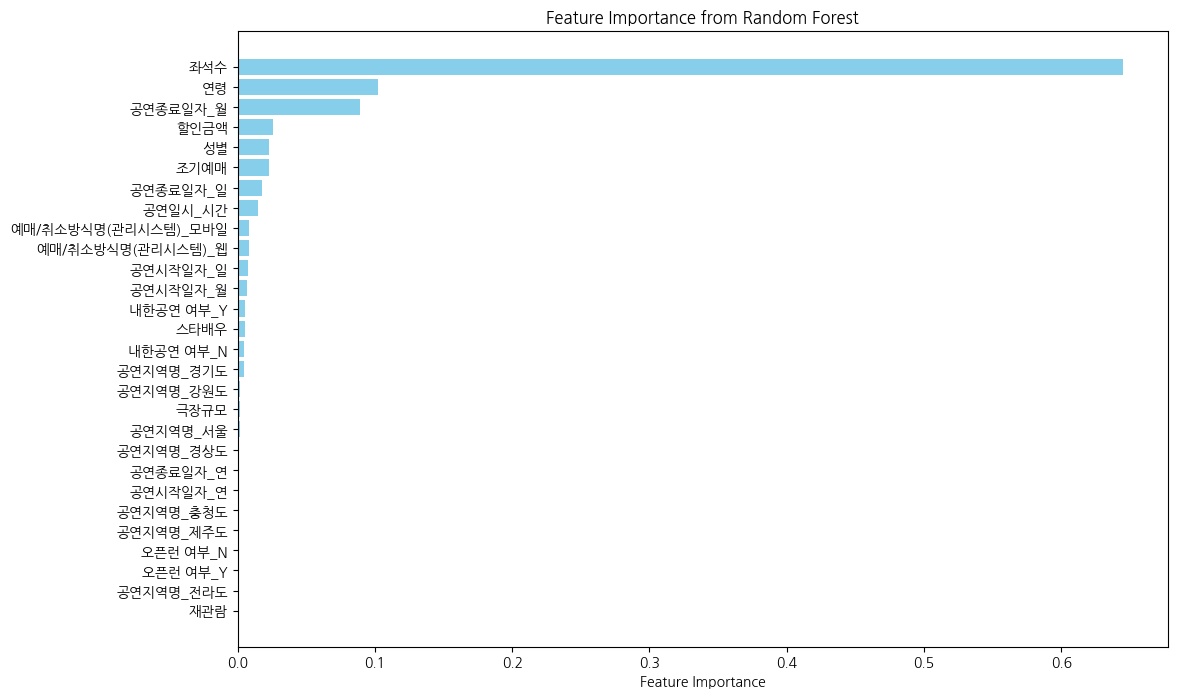

In [33]:
# 뮤지컬
# 독립변수와 종속변수 설정
X_mus = df_musical[['좌석수', '할인금액','성별', '연령', '극장규모', '재관람', '조기예매', '공연일시_시간', '공연시작일자_연', '공연시작일자_월', '공연시작일자_일', '공연종료일자_연', '공연종료일자_월', '공연종료일자_일', '스타배우', '공연지역명_강원도', '공연지역명_경기도', '공연지역명_경상도', '공연지역명_서울', '공연지역명_전라도', '공연지역명_제주도', '공연지역명_충청도',
                  '예매/취소방식명(관리시스템)_모바일', '예매/취소방식명(관리시스템)_웹', '내한공연 여부_Y','내한공연 여부_N', '오픈런 여부_N', '오픈런 여부_Y']]

y_mus = df_musical['장당금액']

# Train-Test Split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_mus, y_mus, test_size=0.2, random_state=42)


# 랜덤 포레스트 회귀 모델 학습
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_m, y_train_m)

# 테스트 데이터 예측
y_pred_m = rf_model.predict(X_test_m)

# 모델 성능 평가
mse = mean_squared_error(y_test_m, y_pred_m)
r2 = r2_score(y_test_m, y_pred_m)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# 피쳐 중요도 추출
feature_importances = rf_model.feature_importances_

# 피쳐 중요도를 시각화하기 위해 정렬
features = X_mus.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 피쳐 중요도 시각화
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()


Mean Squared Error: 24951592.02428583
R2 Score: 0.9066928586790522


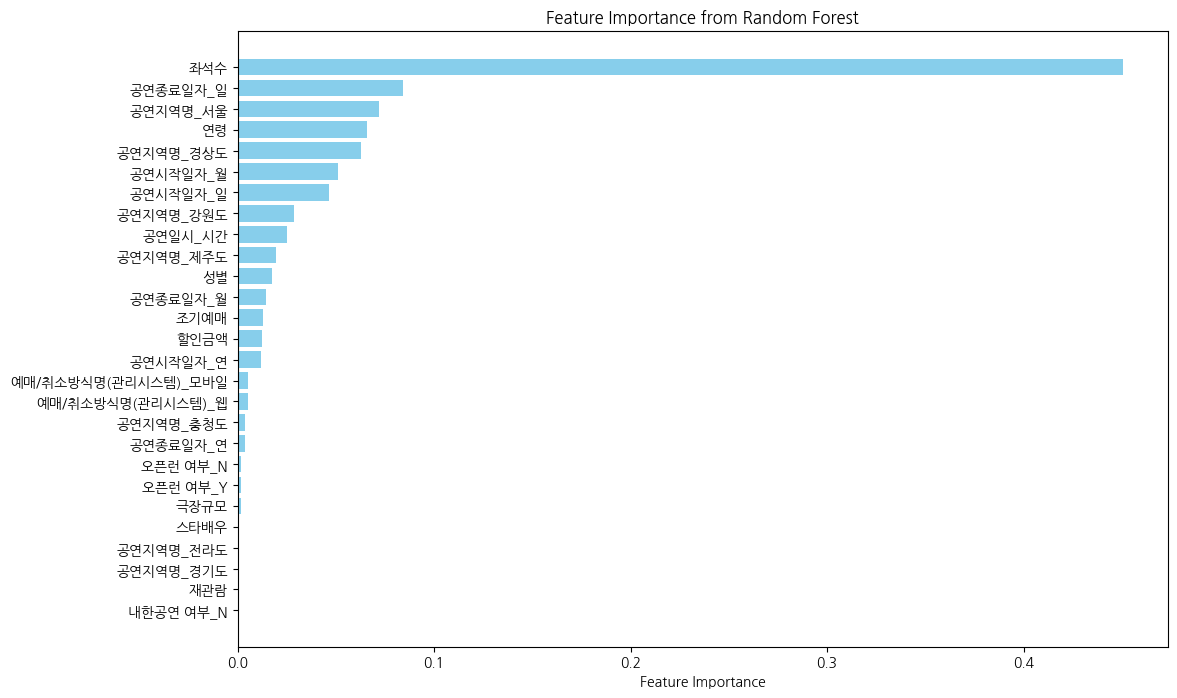

In [34]:
# 연극
# 독립변수와 종속변수 설정
X_play = df_play[['좌석수', '할인금액','성별', '연령', '극장규모', '재관람', '조기예매', '공연일시_시간', '공연시작일자_연', '공연시작일자_월', '공연시작일자_일', '공연종료일자_연', '공연종료일자_월', '공연종료일자_일', '스타배우', '공연지역명_강원도', '공연지역명_경기도', '공연지역명_경상도', '공연지역명_서울', '공연지역명_전라도', '공연지역명_제주도', '공연지역명_충청도',
                  '예매/취소방식명(관리시스템)_모바일', '예매/취소방식명(관리시스템)_웹', '내한공연 여부_N', '오픈런 여부_N', '오픈런 여부_Y']]

y_play = df_play['예매/취소금액']

# 랜덤 포레스트 회귀 모델 학습
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_p, y_train_p)

# 테스트 데이터 예측
y_pred_p = rf_model.predict(X_test_p)

# 모델 성능 평가
mse = mean_squared_error(y_test_p, y_pred_p)
r2 = r2_score(y_test_p, y_pred_p)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# 피쳐 중요도 추출
feature_importances = rf_model.feature_importances_

# 피쳐 중요도를 시각화하기 위해 정렬
features = X_play.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 피쳐 중요도 시각화
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()


Mean Squared Error: 739400295.9676739
R2 Score: 0.7178329164330443


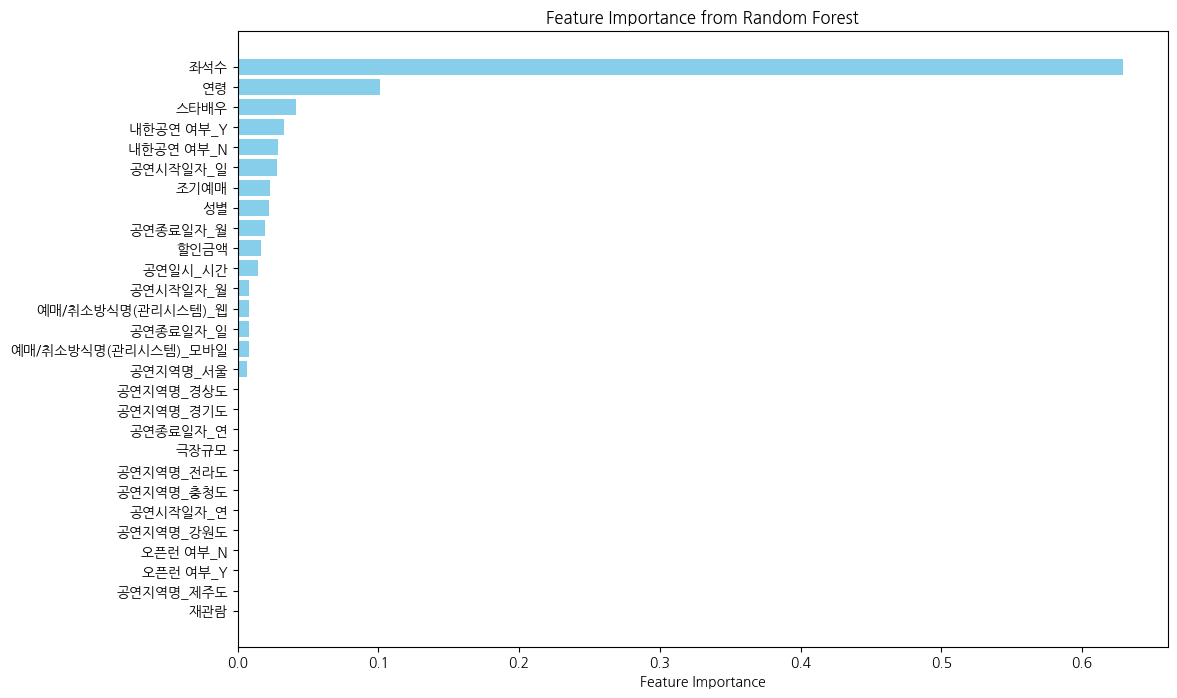

In [35]:
# 뮤지컬
# 독립변수와 종속변수 설정
X_mus = df_musical[['좌석수', '할인금액','성별', '연령', '극장규모', '재관람', '조기예매', '공연일시_시간', '공연시작일자_연', '공연시작일자_월', '공연시작일자_일', '공연종료일자_연', '공연종료일자_월', '공연종료일자_일', '스타배우', '공연지역명_강원도', '공연지역명_경기도', '공연지역명_경상도', '공연지역명_서울', '공연지역명_전라도', '공연지역명_제주도', '공연지역명_충청도',
                  '예매/취소방식명(관리시스템)_모바일', '예매/취소방식명(관리시스템)_웹', '내한공연 여부_Y','내한공연 여부_N', '오픈런 여부_N', '오픈런 여부_Y']]

y_mus = df_musical['예매/취소금액']

# Train-Test Split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_mus, y_mus, test_size=0.2, random_state=42)


# 랜덤 포레스트 회귀 모델 학습
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_m, y_train_m)

# 테스트 데이터 예측
y_pred_m = rf_model.predict(X_test_m)

# 모델 성능 평가
mse = mean_squared_error(y_test_m, y_pred_m)
r2 = r2_score(y_test_m, y_pred_m)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# 피쳐 중요도 추출
feature_importances = rf_model.feature_importances_

# 피쳐 중요도를 시각화하기 위해 정렬
features = X_mus.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 피쳐 중요도 시각화
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()


# 결론

스타배우의 중요도가 둘 다 그닥.